In [12]:
from drn_interactions.io import load_derived_generic
from IPython.display import Image, display
from drn_interactions.config import Config
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [21]:
def responder_stats(df, effect_col, sig_col="sig"):
    out = dict(
        N=len(df),
        mean_mag=df[effect_col].abs().mean(),
        pct_sig=df[sig_col].mean() * 100,
        pct_activated=(df.loc[df[sig_col]][effect_col] > 0).mean() * 100
    )
    return pd.Series(out)

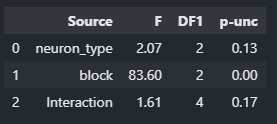

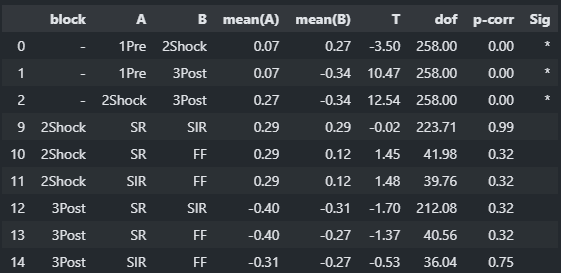

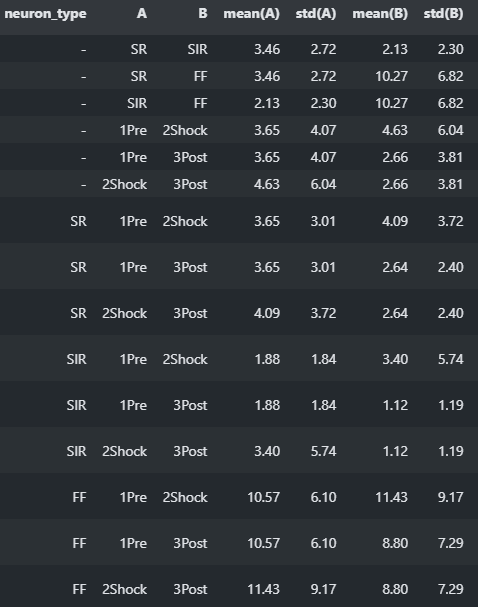

{'n_sessions': 8, 'n_neurons': 259}

,N,mean_mag,pct_sig,pct_activated
neuron_type,,,,
FF,30.0,0.84,90.00,48.15
SIR,118.0,0.75,90.68,63.55
SR,111.0,0.76,91.89,61.76


,N,mean_mag,pct_sig,pct_activated
neuron_type,,,,
FF,30.0,0.70,86.67,26.92
SIR,118.0,0.54,84.75,19.00
SR,111.0,0.67,88.29,13.27


In [25]:
# Dataset and Slow Timescale

table_dir = Config.table_dir

display(Image(filename=table_dir / "foot_shock_slow_anova.png")) 
display(Image(filename=table_dir / "foot_shock_slow_contrasts.png"))
display(Image(filename=table_dir / "foot_shock_slow_block_spikerates.png"))


slow_responders_shock = (
    load_derived_generic(
        "slow_ts_foot_shock_unit_responders_pre_to_shock.csv"
        )
)
slow_responders_post = (
    load_derived_generic(
        "slow_ts_foot_shock_unit_responders_pre_to_post.csv"
        )
)

n_sessions = slow_responders_shock["session_name"].nunique()
n_neurons = len(slow_responders_shock)

display(dict(n_sessions=n_sessions, n_neurons=n_neurons))

neurons_preshock = (
    slow_responders_shock
    .groupby("neuron_type")
    .apply(responder_stats, effect_col="diff_inv", sig_col="sig")
    .round(2)
)
display(neurons_preshock)

neurons_prepost = (
    slow_responders_post
    .groupby("neuron_type")
    .apply(responder_stats, effect_col="diff_inv", sig_col="sig")
    .round(2)
)
display(neurons_prepost)

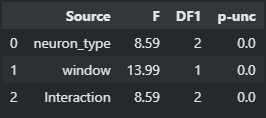

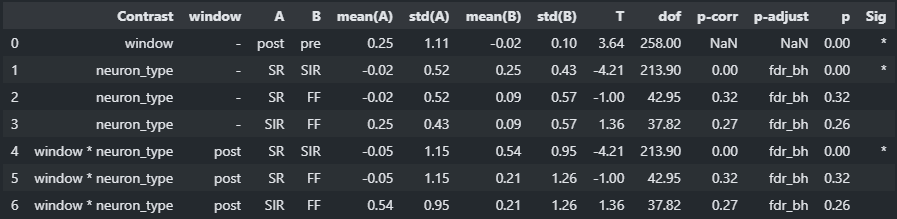

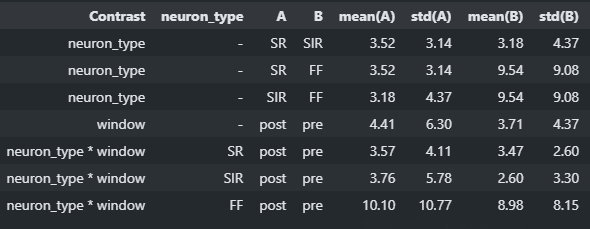

,N,mean_mag,pct_sig,pct_activated
neuron_type,,,,
FF,30.0,1.11,66.67,50.00
SIR,118.0,0.96,66.10,74.36
SR,111.0,0.98,64.86,38.89


In [31]:
# Fast Timescale

display(Image(filename=table_dir / "foot_shock_fast_anova.png")) 
display(Image(filename=table_dir / "foot_shock_fast_contrasts.png"))
display(Image(filename=table_dir / "foot_shock_fast_spike_counts.png"))

fast_responders = load_derived_generic(
    "fast_fs_foot_shock_unit_responders.csv"
    )

neurons_fast = (
    fast_responders
    .groupby("neuron_type")
    .apply(responder_stats, effect_col="Diff", sig_col="sig")
    .round(2)
)
display(neurons_fast)


In [37]:
from drn_interactions.stats import se_mean

df_mi = load_derived_generic("mi_psth_halfs.csv")

res_mi = df_mi.groupby("Method")["MI"].apply(lambda x: pd.Series(dict(
    mean=x.mean(),
    se=se_mean(x)
    ))).round(4)

display(res_mi)

Method        
Observed  mean    0.4075
          se      0.0013
Shuffled  mean    0.0081
          se      0.0002
Name: MI, dtype: float64

In [58]:
# Response clusters
from statsmodels.stats.contingency_tables import Table
from scipy.stats import chi2_contingency
from drn_interactions.stats import prop_of_total

df_clust = load_derived_generic("fs_resonse_clusters.csv")
tab= pd.crosstab(df_clust["neuron_type"], df_clust["cluster"])

pct_each = tab.apply(prop_of_total, axis=1).multiply(100).round(2)

stat, p, dof, expected = chi2_contingency(tab.values) 
tab_resids = Table(tab).standardized_resids

print(f"Chi2({dof}) = {stat:.2f}\nP = {p:.2f}")
display(pct_each)
display(tab_resids.round(2))


Chi2(4) = 23.25
P = 0.00


cluster,0,1,2
neuron_type,,,
FF,30.00,36.67,33.33
SIR,18.64,30.51,50.85
SR,45.05,29.73,25.23


cluster,0,1,2
neuron_type,,,
FF,-0.16,0.73,-0.54
SIR,-4.01,-0.12,3.95
SR,4.14,-0.35,-3.62
